<a href="https://colab.research.google.com/github/DaiVo20/za_traffic_detection/blob/main/keras_retinanet/train_model_keras_retinanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connect to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Install library**

In [2]:
!pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=020899c8534689b0eaef9b2f8ad5fe13e441c7e1fef9a5cf07533cb9f9548573
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet


In [3]:
!git clone https://github.com/DaiVo20/za_traffic_detection

Cloning into 'za_traffic_detection'...
remote: Enumerating objects: 249, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 249 (delta 77), reused 184 (delta 39), pack-reused 0
Receiving objects: 100% (249/249), 38.06 MiB | 21.51 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [4]:
!python /content/za_traffic_detection/keras_retinanet/setup.py build_ext --inplace

running build_ext
cythoning za_traffic_detection/keras_retinanet/keras_retinanet/utils/compute_overlap.pyx to za_traffic_detection/keras_retinanet/keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/za_traffic_detection/keras_retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'za_traffic_detection.keras_retinanet.keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/za_traffic_detection
creating build/temp.linux-x86_64-3.7/za_traffic_detection/keras_retinanet
creating build/temp.linux-x86_64-3.7/za_traffic_detection/keras_retinanet/keras_retinanet
creating build/temp.linux-x86_64-3.7/za_traffic_detection/keras_retinanet/keras_retinanet/utils
x86_64-linux-gn

# **Prepare data**

In [2]:
import pandas as pd 

idx2sign = {
    1: "No entry", # Cấm ngược chiều
    2: "No parking / waiting", # Cấm dừng và đỗ
    3: "No turning", # Cấm rẽ
    4: "Max Speed", # Giới hạn tốc độ
    5: "Other prohibition signs", # Cấm còn lại
    6: "Warning", # Nguy hiểm
    7: "Mandatory" # Hiệu lệnh
}

class_name = [["No entry", 0],
              ["No parking / waiting", 1],
              ["No turning", 2],
              ["Max Speed", 3],
              ["Other prohibition signs", 4],
              ["Warning", 5],
              ["Mandatory", 6]]

pd.DataFrame(class_name).to_csv("class.csv", index=None)

In [3]:
df_train =  pd.read_csv("/content/drive/MyDrive/TrafficSign/data/za_traffic_2020/traffic_train/train.csv")
df_train.to_csv('train.csv', index=None, header=False)

df_test =  pd.read_csv("/content/drive/MyDrive/TrafficSign/data/za_traffic_2020/traffic_public_test/test.csv")
df_test.to_csv('test.csv', index=None, header=False)

In [4]:
df_train_croped = pd.read_csv('/content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/image_crop/traffic_train/train_croped.csv')
df_train_croped['class'] = df_train_croped['label'].replace(idx2sign)
df_train_croped.drop(columns=['width', 'height', 'label'], axis=1, inplace=True)
df_train_croped.to_csv('df_train_croped.csv', index=None, header=False)

df_test_croped = pd.read_csv('/content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/image_crop/traffic_public_test/test_croped.csv')
df_test_croped['class'] = df_test_croped['label'].replace(idx2sign)
df_test_croped.drop(columns=['width', 'height', 'label'], axis=1, inplace=True)
df_test_croped = df_test_croped[df_test_croped['class'].notna()]
df_test_croped.to_csv('df_test_croped.csv', index=None, header=False)

# **Train**

## **Data crop**

In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/train.py --snapshot-path /content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/snapshots \
                                                                                   --epochs 50 \
                                                                                   --initial-epoch 0 \
                                                                                   --steps 462 \
                                                                                   --batch-size 8 \
                                                                                   csv /content/train4.csv /content/class.csv

102957056/102945312 [==============================] - 1s 0us/step
Creating model, this may take a second...
2022-01-17 10:48:15.338482: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                   

In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/train.py --snapshot-path /content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/snapshots \
                                                                                   --weights /content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/snapshots/resnet50_csv_25.h5 \
                                                                                   --epochs 50 \
                                                                                   --initial-epoch 25 \
                                                                                   --steps 462 \
                                                                                   --batch-size 8 \
                                                                                   csv /content/train4.csv /content/class.csv

Creating model, this may take a second...
2022-01-17 18:02:48.086431: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/train.py --snapshot-path /content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/snapshots \
                                                                                   --weights /content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/snapshots/resnet50_csv_35.h5 \
                                                                                   --epochs 50 \
                                                                                   --initial-epoch 35 \
                                                                                   --steps 462 \
                                                                                   --batch-size 8 \
                                                                                   csv /content/train4.csv /content/class.csv

Creating model, this may take a second...
2022-01-18 03:55:28.447322: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/train.py --snapshot-path /content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/snapshots \
                                                                                   --weights /content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/snapshots/resnet50_csv_40.h5 \
                                                                                   --epochs 50 \
                                                                                   --initial-epoch 40 \
                                                                                   --steps 462 \
                                                                                   --batch-size 8 \
                                                                                   csv /content/train4.csv /content/class.csv

Creating model, this may take a second...
2022-01-18 05:46:38.217093: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

## **Data original**

In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/train.py --snapshot-path /content/drive/MyDrive/TrafficSign/Model/RetinaNet/snapshots \
                                                                                   --epochs 50 \
                                                                                   --initial-epoch 0 \
                                                                                   --steps 562 \
                                                                                   --batch-size 8 \
                                                                                   csv /content/train.csv /content/class.csv

102957056/102945312 [==============================] - 1s 0us/step
Creating model, this may take a second...
2022-01-13 15:44:30.829512: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                   

In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/train.py --snapshot-path /content/drive/MyDrive/TrafficSign/Model/RetinaNet/snapshots \
                                                                                   --weights /content/drive/MyDrive/TrafficSign/Model/RetinaNet/snapshots/resnet50_csv_17.h5 \
                                                                                   --epochs 50 \
                                                                                   --initial-epoch 17 \
                                                                                   --steps 562 \
                                                                                   --batch-size 8 \
                                                                                   csv /content/train.csv /content/class.csv

Creating model, this may take a second...
2022-01-14 02:17:43.359591: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/train.py --snapshot-path /content/drive/MyDrive/TrafficSign/Model/RetinaNet/snapshots \
                                                                                   --weights /content/drive/MyDrive/TrafficSign/Model/RetinaNet/snapshots/resnet50_csv_35.h5 \
                                                                                   --epochs 50 \
                                                                                   --initial-epoch 35 \
                                                                                   --steps 562 \
                                                                                   --batch-size 8 \
                                                                                   csv /content/train.csv /content/class.csv

Creating model, this may take a second...
2022-01-14 14:50:32.813335: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/train.py --snapshot-path /content/drive/MyDrive/TrafficSign/Model/RetinaNet/snapshots \
                                                                                   --weights /content/drive/MyDrive/TrafficSign/Model/RetinaNet/snapshots/resnet50_csv_44.h5 \
                                                                                   --epochs 50 \
                                                                                   --initial-epoch 44 \
                                                                                   --steps 562 \
                                                                                   --batch-size 8 \
                                                                                   csv /content/train.csv /content/class.csv

Creating model, this may take a second...
2022-01-14 18:47:44.683171: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

# **Evaluate**

## **Data original**

In [21]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/evaluate.py --score-threshold 0.05 --iou-threshold 0.3 csv /content/test.csv /content/class.csv \
                                                                                      /content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_original/infer_model/resnet50_csv_50.h5

Loading model, this may take a second...
2022-01-25 01:59:54.438051: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (568 of 568) |######| Elapsed Time: 0:01:30 Time:  0:01:30
Parsing annotations: 100% (568 of 568) |##| Elapsed Time: 0:00:00 Time:  0:00:00
146 instances of class No entry with average precision: 0.1478
268 instances of class No parking / waiting with average precision: 0.2812
70 instances of class No turning with average precision: 0.3056
119 instances of class Max Speed with average precision: 0.2711
218 instances of class Other prohibition signs with average precision: 0.1791
225 instances of class Warning with average precision: 0.2380
162 instances of class Mandatory with average precision: 0.1597
Inference time for 568 images: 0.0942
mAP using the weighted average of precisions among classes: 0.2228
mAP:

## **Data crop**

### **Single**

In [24]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/evaluate.py --score-threshold 0.05 --iou-threshold 0.3 csv /content/df_test_croped.csv /content/class.csv \
                                                                                      /content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/infer_model/resnet50_csv_50.h5
                                                                                      

Loading model, this may take a second...
2022-01-25 02:06:52.992624: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running network: 100% (574 of 574) |######| Elapsed Time: 0:01:04 Time:  0:01:04
Parsing annotations: 100% (574 of 574) |##| Elapsed Time: 0:00:00 Time:  0:00:00
68 instances of class No entry with average precision: 0.7427
201 instances of class No parking / waiting with average precision: 0.9277
54 instances of class No turning with average precision: 0.7007
92 instances of class Max Speed with average precision: 0.8670
127 instances of class Other prohibition signs with average precision: 0.7184
131 instances of class Warning with average precision: 0.8986
87 instances of class Mandatory with average precision: 0.7012
Inference time for 574 images: 0.0936
mAP using the weighted average of precisions among classes: 0.8218
mAP: 0.

### **Combine**

In [29]:
import cv2
import time
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from za_traffic_detection.keras_retinanet.keras_retinanet.models import load_model
from za_traffic_detection.keras_retinanet.keras_retinanet.utils.colors import label_color
from za_traffic_detection.keras_retinanet.keras_retinanet.utils.visualization import draw_box, draw_caption
from za_traffic_detection.keras_retinanet.keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image

In [25]:
path_save_label = '/content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/label_combine'
os.makedirs(path_save_label, exist_ok=True)

path_save_predict = '/content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/predict_combine'
os.makedirs(path_save_predict, exist_ok=True)

In [14]:
index_class = {
    1: "no_entry",
    2: "no_parking_waiting",
    3: "no_turning",
    4: "max_speed",
    5: "other_prohibition_signs",
    6: "warning",
    7: "mandatory"
}

In [17]:
df_test = pd.read_csv('/content/drive/MyDrive/TrafficSign/data/za_traffic_2020/traffic_public_test/test.csv')
df_test['width'] = df_test['xmax'] - df_test['xmin']
df_test['height'] = df_test['ymax'] - df_test['ymin']
df_test['class_'] = df_test['label'].replace(index_class)
image_names = df_test.file_name.unique()

grouped = df_test.groupby(df_test.file_name)
for file_name in tqdm(image_names):
    img_name = file_name.split('/')[-1].split('.')[0]
    item = grouped.get_group(file_name)
    item = item.loc[:,['xmin', 'ymin', 'width', 'height', 'class_']]
    item = item.reindex(columns=['class_', 'xmin', 'ymin', 'width', 'height'])
    item.to_csv(os.path.join(path_save_label, img_name + '.txt'), sep=' ', index=False, header=None)

100%|██████████| 568/568 [00:03<00:00, 143.40it/s]


In [ ]:
!python /content/za_traffic_detection/keras_retinanet/keras_retinanet/bin/convert_model.py \
        /content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/snapshots/resnet50_csv_50.h5 \
        /content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/infer_model/resnet50_csv_50.h5

In [26]:
path_model = '/content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/infer_model/resnet50_csv_50.h5'
model = load_model(path_model, backbone_name='resnet50')

In [27]:
index_class_zero = {
    0: "no_entry",
    1: "no_parking_waiting",
    2: "no_turning",
    3: "max_speed",
    4: "other_prohibition_signs",
    5: "warning",
    6: "mandatory"
}

In [30]:
path_image = '/content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/image_crop/traffic_public_test_all/images'
image_crop_names = os.listdir(path_image)
WIDTH = 405
HEIGHT = 156

dict_predict = {'class':[], 'confidence':[], 'x':[], 'y':[], 'w':[], 'h':[]}
for index, file_name in tqdm(enumerate(image_crop_names)):
    if (index + 1) % 16 == 0:
        pd.DataFrame(dict_predict).to_csv(os.path.join(path_save_predict, name + '.txt'), sep=' ', index=False, header=None)
        dict_predict = {'class':[], 'confidence':[], 'x':[], 'y':[], 'w':[], 'h':[]}

    ele_name = file_name.split('/')[-1].split('.')[0].split('_')
    name = ele_name[0]
    column = ele_name[1]
    row = ele_name[2]

    image_current = read_image_bgr(os.path.join(path_image, file_name))
    image_current = preprocess_image(image_current)
    image_current, scale = resize_image(image_current)

    boxes, scores, classes = model.predict_on_batch(np.expand_dims(image_current, axis=0))
    boxes /= scale

    for box, score, class_ in zip(boxes[0], scores[0], classes[0]):
        box = box.astype(int)
        x1, y1, x2, y2 = box
        x_new = x1 + int(row) * WIDTH
        y_new = y1 + int(column) * HEIGHT
        w, h = x2 - x1, y2 - y1
        confidence = score

        if confidence < 0.05:
            continue

        dict_predict['class'].append(index_class_zero[int(class_)])
        dict_predict['confidence'].append(confidence)
        dict_predict['x'].append(x_new)
        dict_predict['y'].append(y_new)
        dict_predict['w'].append(w)
        dict_predict['h'].append(h)

9088it [15:53,  9.53it/s]


In [34]:
!python /content/za_traffic_detection/keras_retinanet/evaluation/pascalvoc.py \
              --gtfolder /content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/label_combine \
              --detfolder /content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/predict_combine \
              --threshold 0.3 \
              --noplot



###########################################################################################
#                                                                                         #
# This sample shows how to evaluate object detections applying the following metrics:     #
#  * Precision x Recall curve       ---->       used by VOC PASCAL 2012)                  #
#  * Average Precision (AP)         ---->       used by VOC PASCAL 2012)                  #
#                                                                                         #
# Developed by: Rafael Padilla (rafael.padilla@smt.ufrj.br)                               #
#        SMT - Signal Multimedia and Telecommunications Lab                               #
#        COPPE - Universidade Federal do Rio de Janeiro                                   #
#        Last modification: Feb 12th 2021                                                 #
##############################################################################

# **Predict**

In [ ]:
path_model = '/content/drive/MyDrive/TrafficSign/Model/RetinaNet/train_model_data_crop/infer_model/resnet50_csv_50.h5'
model = load_model(path_model, backbone_name='resnet50')

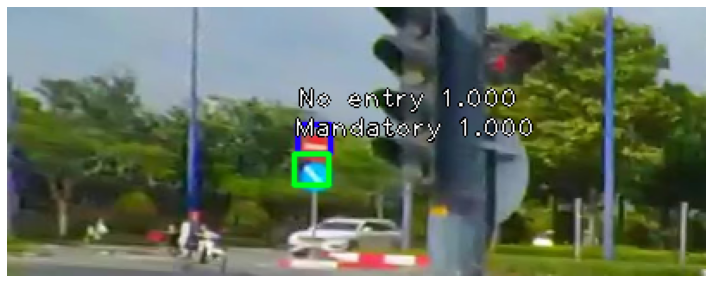

In [28]:
labels_to_names = {
    0: "No entry",  # Cấm ngược chiều
    1: "No parking / waiting",  # Cấm dừng và đỗ
    2: "No turning",  # Cấm rẽ
    3: "Max Speed",  # Giới hạn tốc độ
    4: "Other prohibition signs",  # Cấm còn lại
    5: "Warning",  # Nguy hiểm
    6: "Mandatory"  # Hiệu lệnh
}

# load image
image = read_image_bgr('/content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/image_crop/traffic_public_test_all/images/30_1_0.png')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(draw, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)

plt.figure(figsize=(10, 5))
plt.axis('off')
plt.imshow(draw)
plt.tight_layout()
plt.show()